In [1]:

# imports
import os
import sys
import types
import json

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = fig_dpi
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
if r'/Users/hirofumi48/162348.github.io/posts/2024/Bridges':
  os.chdir(r'/Users/hirofumi48/162348.github.io/posts/2024/Bridges')

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define


/var/folders/gx/6w78f6997l5___173r25fp3m0000gn/T/ipykernel_15492/924563077.py:24: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


{"/opt/homebrew/Cellar/python@3.12/3.12.7/Frameworks/Python.framework/Versions/3.12/lib/python3.12/importlib/_bootstrap.py": 1727748346.0, "/opt/homebrew/Cellar/python@3.12/3.12.7/Frameworks/Python.framework/Versions/3.12/lib/python3.12/importlib/_bootstrap_external.py": 1727748346.0, "/opt/homebrew/Cellar/python@3.12/3.12.7/Frameworks/Python.framework/Versions/3.12/lib/python3.12/zipimport.py": 1727748346.0, "/opt/homebrew/Cellar/python@3.12/3.12.7/Frameworks/Python.framework/Versions/3.12/lib/python3.12/codecs.py": 1727748346.0, "/opt/homebrew/Cellar/python@3.12/3.12.7/Frameworks/Python.framework/Versions/3.12/lib/python3.12/encodings/aliases.py": 1727748346.0, "/opt/homebrew/Cellar/python@3.12/3.12.7/Frameworks/Python.framework/Versions/3.12/lib/python3.12/encodings/__init__.py": 1727748346.0, "/opt/homebrew/Cellar/python@3.12/3.12.7/Frameworks/Python.framework/Versions/3.12/lib/python3.12/encodings/utf_8.py": 1727748346.0, "/opt/homebrew/Cellar/python@3.12/3.12.7/Frameworks/Python.

In [2]:
#| code-summary: 漏斗分布 `funnel()` を定義
import jax
from jax.scipy.stats import multivariate_normal
from jax.scipy.stats import norm

import jax.numpy as jnp

def funnel(d=10, sig=3, clip_y=11):
  """Funnel distribution for testing. Returns energy and sample functions."""

  def neg_energy(x):
    def unbatched(x):
      v = x[0]
      log_density_v = norm.logpdf(v,
                                  loc=0.,
                                  scale=3.)
      variance_other = jnp.exp(v)
      other_dim = d - 1
      cov_other = jnp.eye(other_dim) * variance_other
      mean_other = jnp.zeros(other_dim)
      log_density_other = multivariate_normal.logpdf(x[1:],
                                                     mean=mean_other,
                                                     cov=cov_other)
      return log_density_v + log_density_other
    output = jax.vmap(unbatched)(x)
    return output

  def sample_data(n_samples):
    # sample from Nd funnel distribution
    y = (sig * jnp.array(np.random.randn(n_samples, 1))).clip(-clip_y, clip_y)
    x = jnp.array(np.random.randn(n_samples, d - 1)) * jnp.exp(-y / 2)
    return jnp.concatenate((y, x), axis=1)

  return neg_energy, sample_data

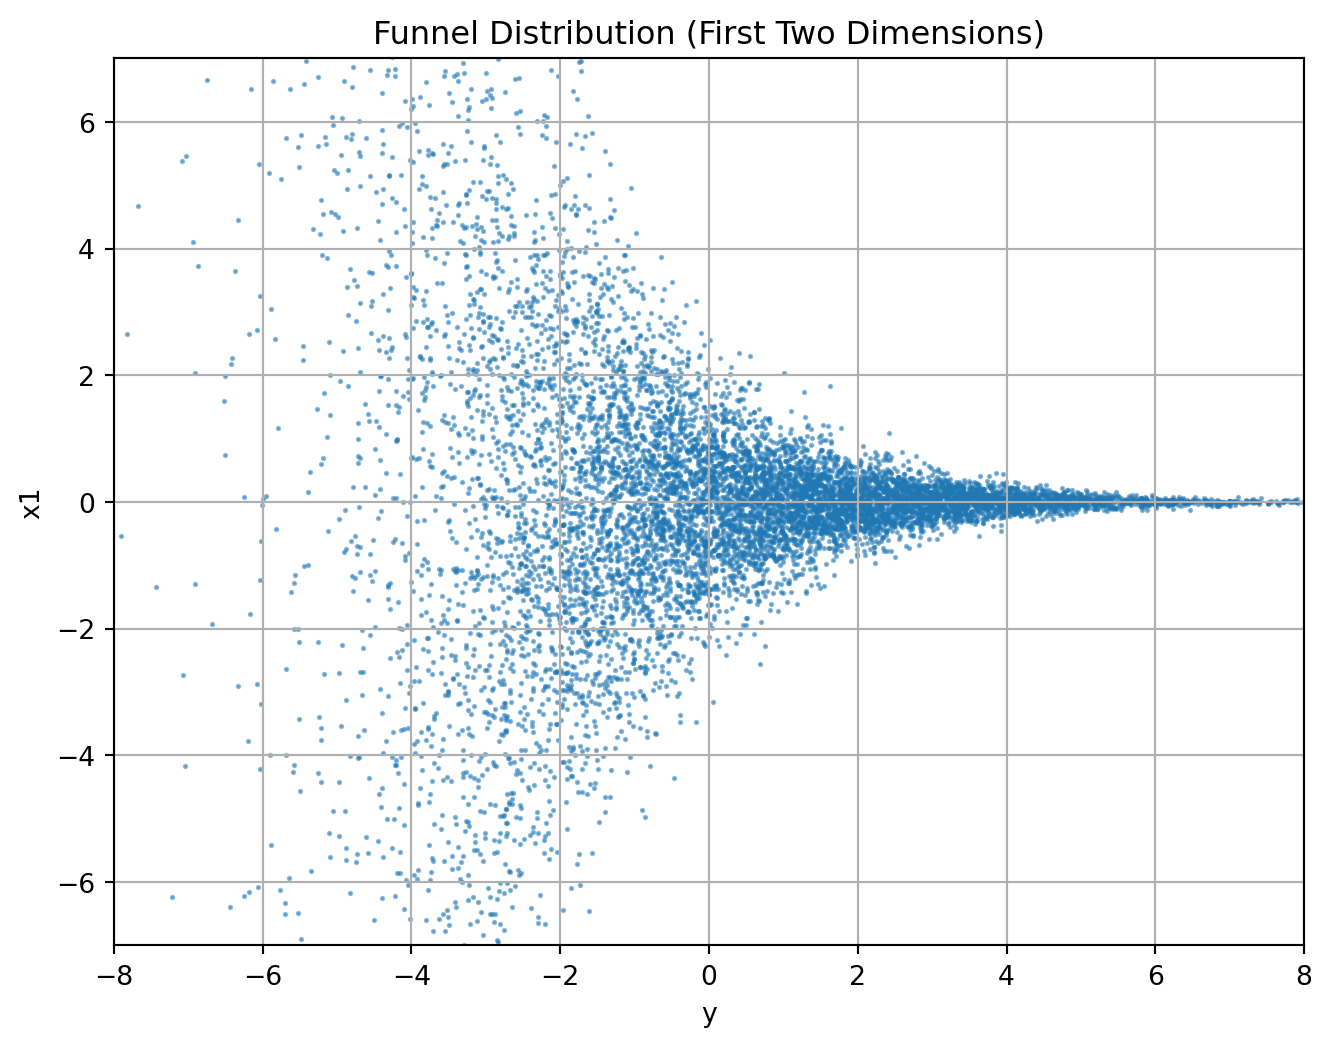

In [3]:
#| code-summary: サンプルデータを生成 (ground truth)
import numpy as np
import matplotlib.pyplot as plt

# ファンネル分布のサンプルデータを生成
neg_energy, sample_data = funnel(d=10)
n_samples = 10000  # サンプル数
data = sample_data(n_samples)

# 最初の2次元を抽出（yとx1）
y = data[:, 0]
x1 = data[:, 1]

# 散布図をプロット
plt.figure(figsize=(8, 6))
plt.scatter(y, x1, alpha=0.5, s=1)
plt.xlabel('y')
plt.ylabel('x1')
plt.title('Funnel Distribution (First Two Dimensions)')
plt.grid(True)

# xlim と ylim を追加
plt.xlim(-8, 8)  # x軸の範囲を -10 から 10 に設定
plt.ylim(-7, 7)  # y軸の範囲を -20 から 20 に設定

plt.show()

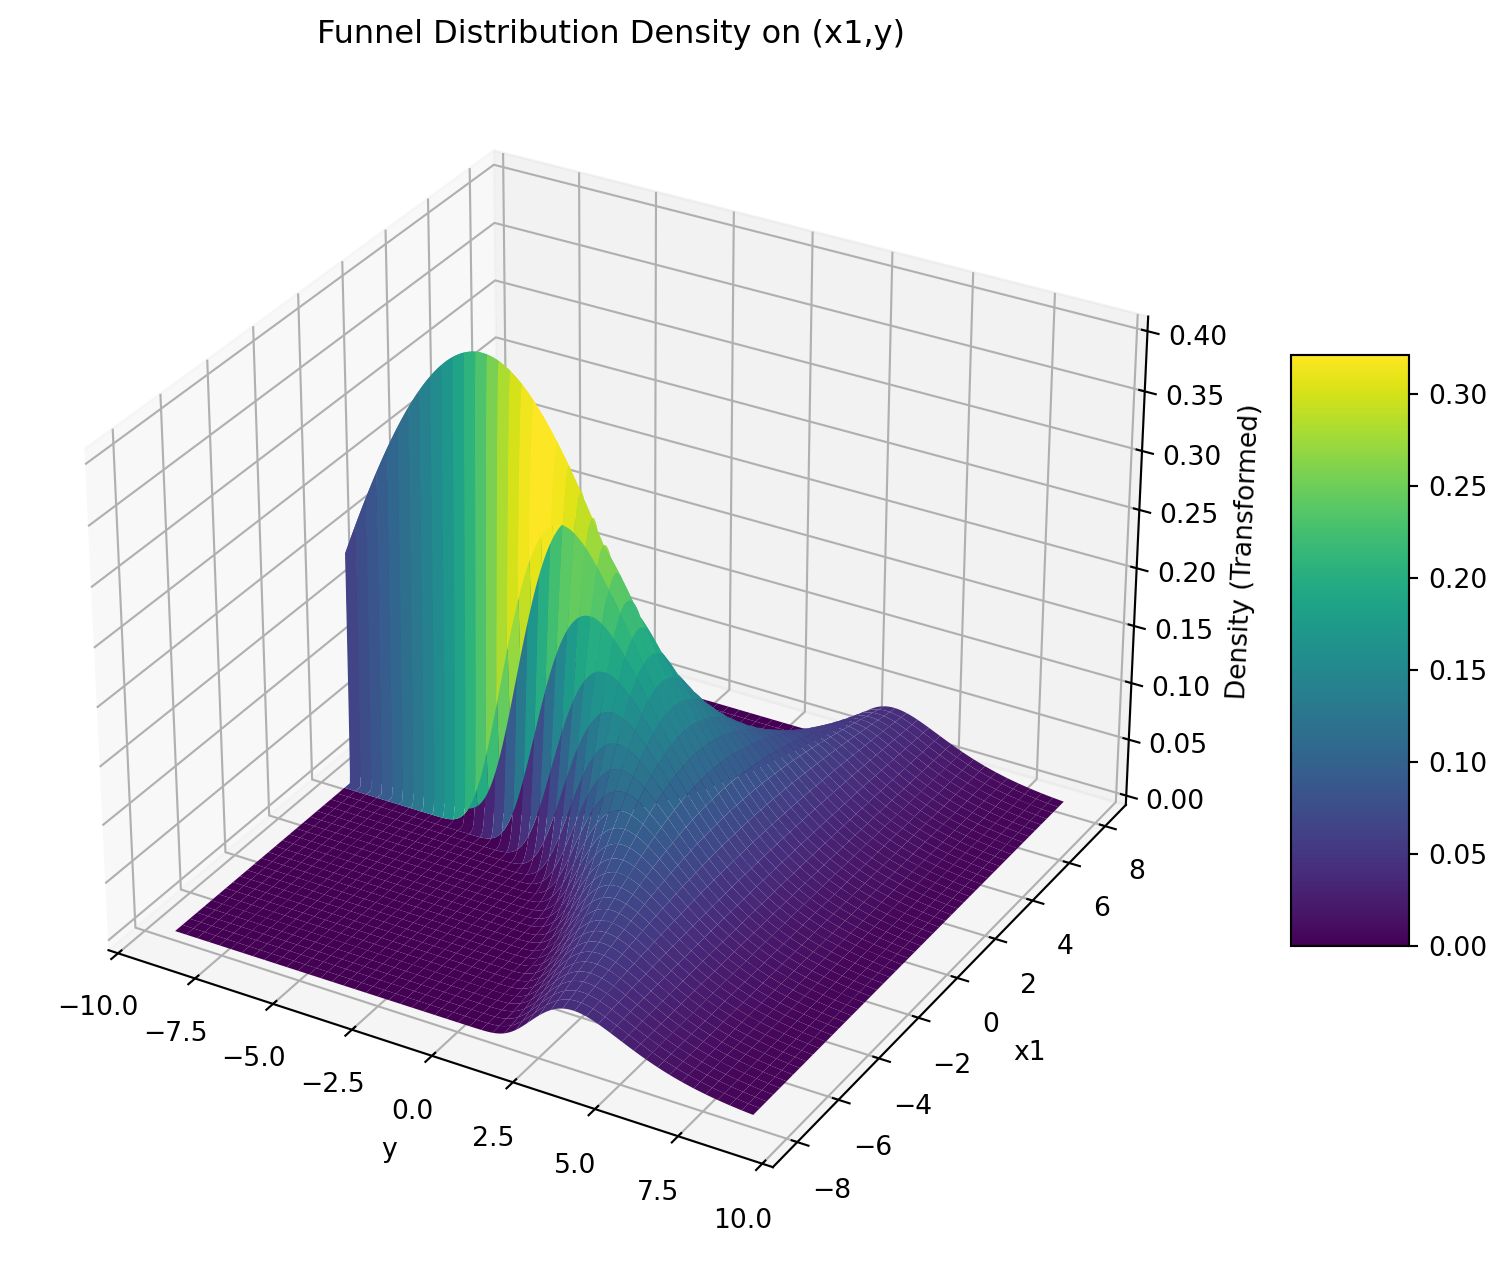

In [4]:
#| code-summary: 3Dプロットの作成
neg_energy, sample_data = funnel(d=2)

# y と x1 の範囲を設定
y_min, y_max = -9, 9
x1_min, x1_max = -8, 8
num_points = 1000  # グリッドの解像度

y_values = np.linspace(y_min, y_max, num_points)
x1_values = np.linspace(x1_min, x1_max, num_points)
Y, X1 = np.meshgrid(y_values, x1_values)

# グリッド上の点を作成
inputs = np.stack([Y.ravel(), X1.ravel()], axis=1)

# 対数密度を計算
log_density = neg_energy(inputs)
density = np.exp(log_density)

log_density = np.sqrt(density)

Density = log_density.reshape(Y.shape)

# 3Dプロットの作成
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# 軸のラベルを設定
ax.set_xlabel('y')
ax.set_ylabel('x1')
ax.set_zlabel('Density (Transformed)')

# サーフェスプロットを作成
surf = ax.plot_surface(Y, X1, Density, cmap='viridis', edgecolor='none')

# カラーバーを追加
fig.colorbar(surf, shrink=0.5, aspect=5)

# タイトルを設定
ax.set_title('Funnel Distribution Density on (x1,y)')

plt.show()

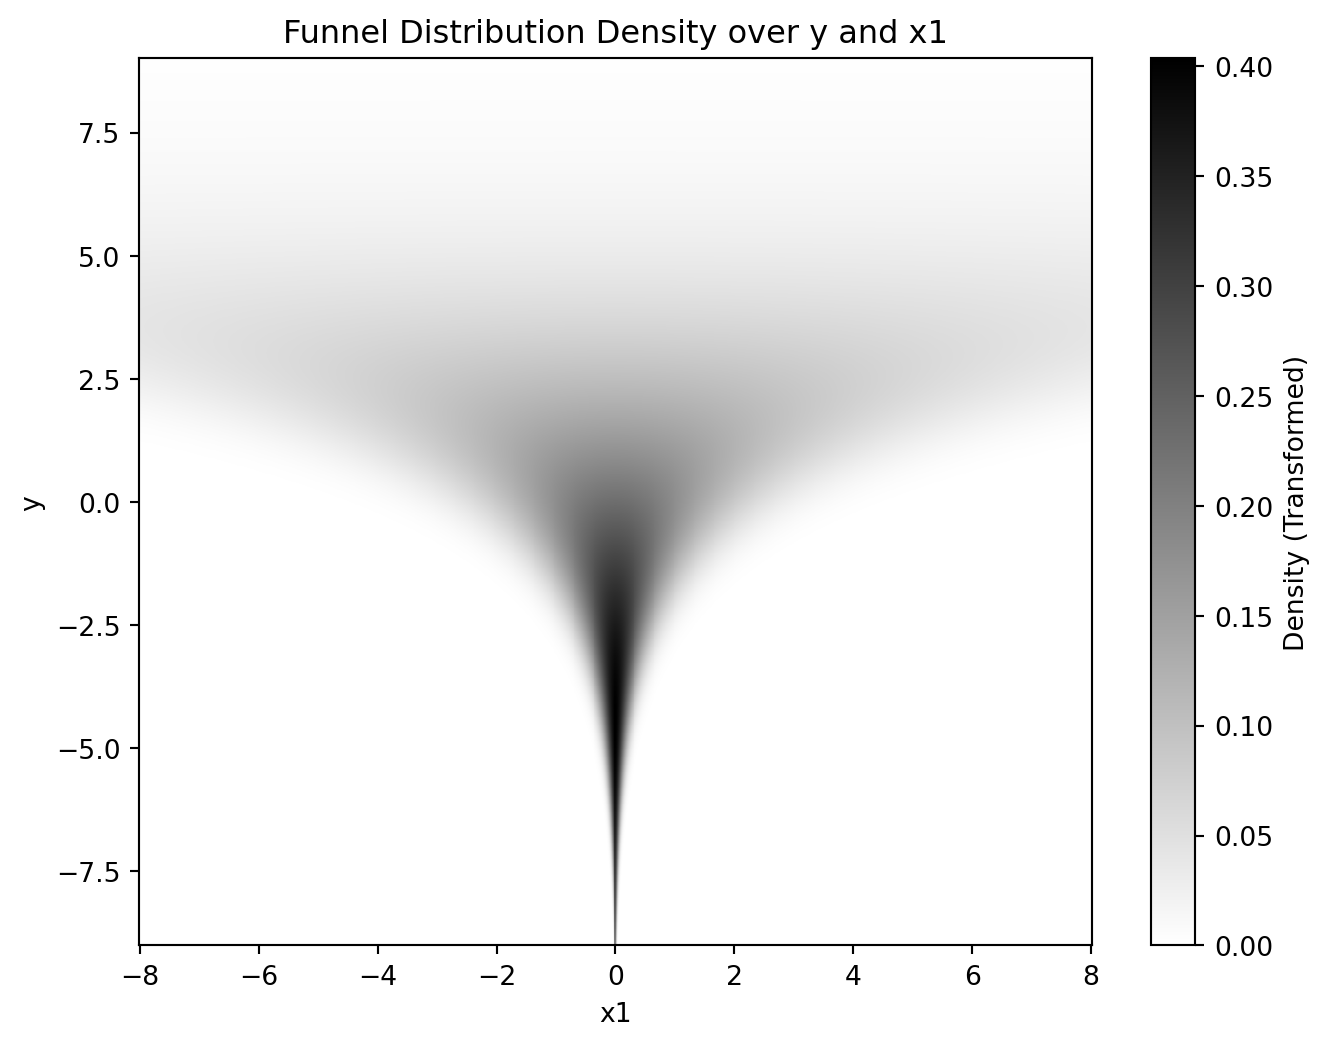

In [5]:
#| code-summary: 2Dヒートマップの作成
# 2Dヒートマップの作成
fig, ax = plt.subplots(figsize=(8, 6))

# pcolormeshを使用してヒートマップを作成
im = ax.pcolormesh(X1, Y, Density, cmap='binary', shading='auto')

# 軸のラベルを設定
ax.set_xlabel('x1')
ax.set_ylabel('y')

# カラーバーを追加
cbar = fig.colorbar(im, ax=ax, label='Density (Transformed)')

# タイトルを設定
ax.set_title('Funnel Distribution Density over y and x1')

plt.show()

In [6]:
#| code-summary: データの読み込み
import numpy as np

sde_data = np.load('Files/sde_data.npy')
ode_data = np.load('Files/ode_data.npy')

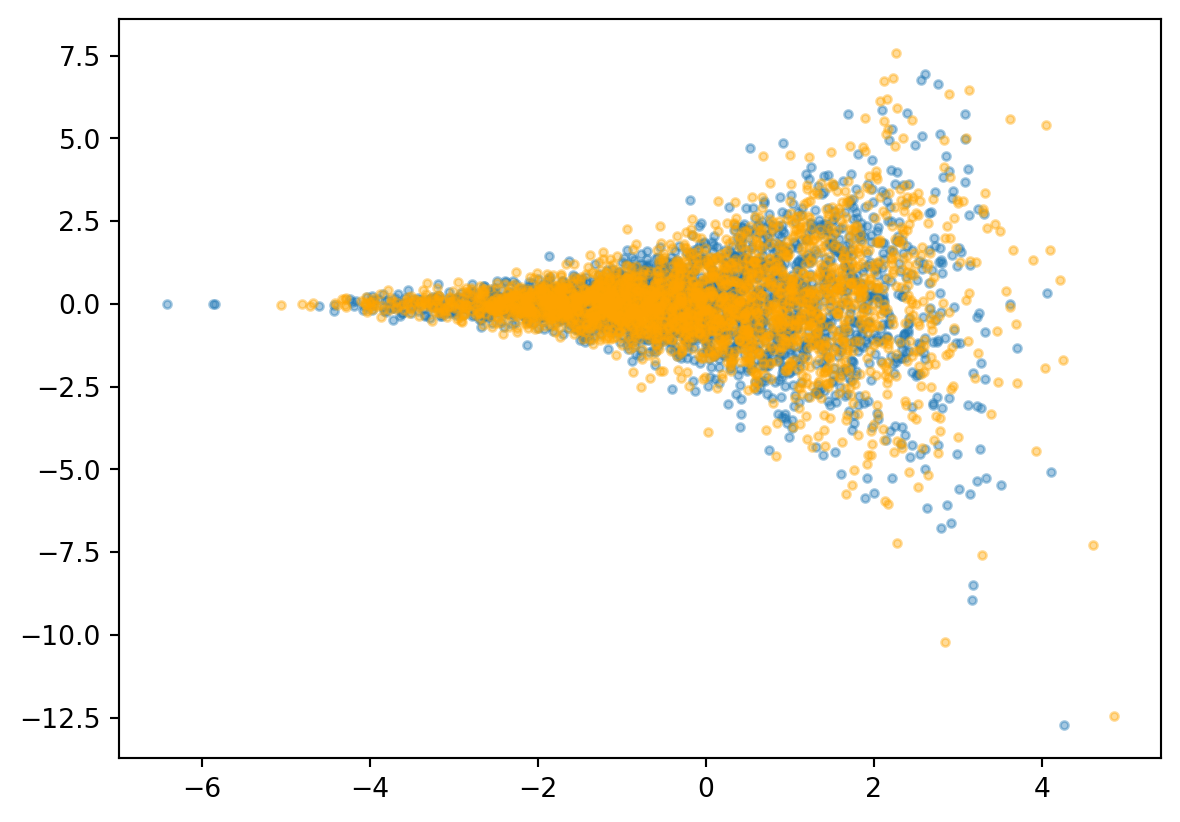

In [7]:
#| code-summary: データのプロット
import matplotlib.pyplot as plt

ode_targ = ode_data[:, -1,:2]
sde_targ = sde_data[:, -1,:2]

plt.plot(ode_targ[:, 0], ode_targ[:, 1], ".", alpha=0.4)
plt.plot(sde_targ[:, 0], sde_targ[:, 1], ".", alpha=0.4, color='orange')

In [8]:
#| code-summary: SDE サンプルのアニメーション
#| eval: false
import matplotlib.animation as animation

# Density のヒートマップ作成（前述のコードから）
neg_energy, sample_data = funnel(d=2)

y_min, y_max = -6, 6
x1_min, x1_max = -8, 8
num_points = 200  # グリッドの解像度を下げて処理を軽くする

y_values = np.linspace(y_min, y_max, num_points)
x1_values = np.linspace(x1_min, x1_max, num_points)
Y, X1 = np.meshgrid(y_values, x1_values)

inputs = np.stack([Y.ravel(), X1.ravel()], axis=1)
log_density = neg_energy(inputs)
density = np.sqrt(np.exp(log_density))
Density = density.reshape(Y.shape)

# プロットの設定
fig, ax = plt.subplots(figsize=(10, 8))

# ヒートマップを描画（Density.T ではなく Density を使用）
im = ax.imshow(Density, extent=[y_min, y_max, x1_min, x1_max], 
               origin='lower', cmap='binary', aspect='auto', alpha=0.7)

# カラーバーを追加
plt.colorbar(im, label='Density')

# 初期データの取得
y0 = sde_data[:, 0, 0]  # y軸（第1次元）
x0 = sde_data[:, 0, 1]  # x軸（第2次元）
data0 = np.column_stack((y0, x0))

# 散布図を描画
scat = ax.scatter(data0[:, 0], data0[:, 1], s=10, alpha=0.5, color='orange')

# 軸の範囲を設定
ax.set_xlim(y_min, y_max)
ax.set_ylim(x1_min, x1_max)
ax.set_xlabel('y')
ax.set_ylabel('x1')
ax.set_title('SDE Samples Animation')

# 初期化関数
def init():
    scat.set_offsets(data0)
    return scat,

# フレームごとの更新関数
def animate(i):
    y = sde_data[:, i, 0]  # y軸（第1次元）
    x = sde_data[:, i, 1]  # x軸（第2次元）
    data = np.column_stack((y, x))
    scat.set_offsets(data)
    return scat,

# アニメーションの作成
ani = animation.FuncAnimation(
    fig, animate, init_func=init, frames=sde_data.shape[1],
    interval=50, blit=False)

# アニメーションの保存
ani.save('sde_animation.gif', writer='pillow', fps=20)

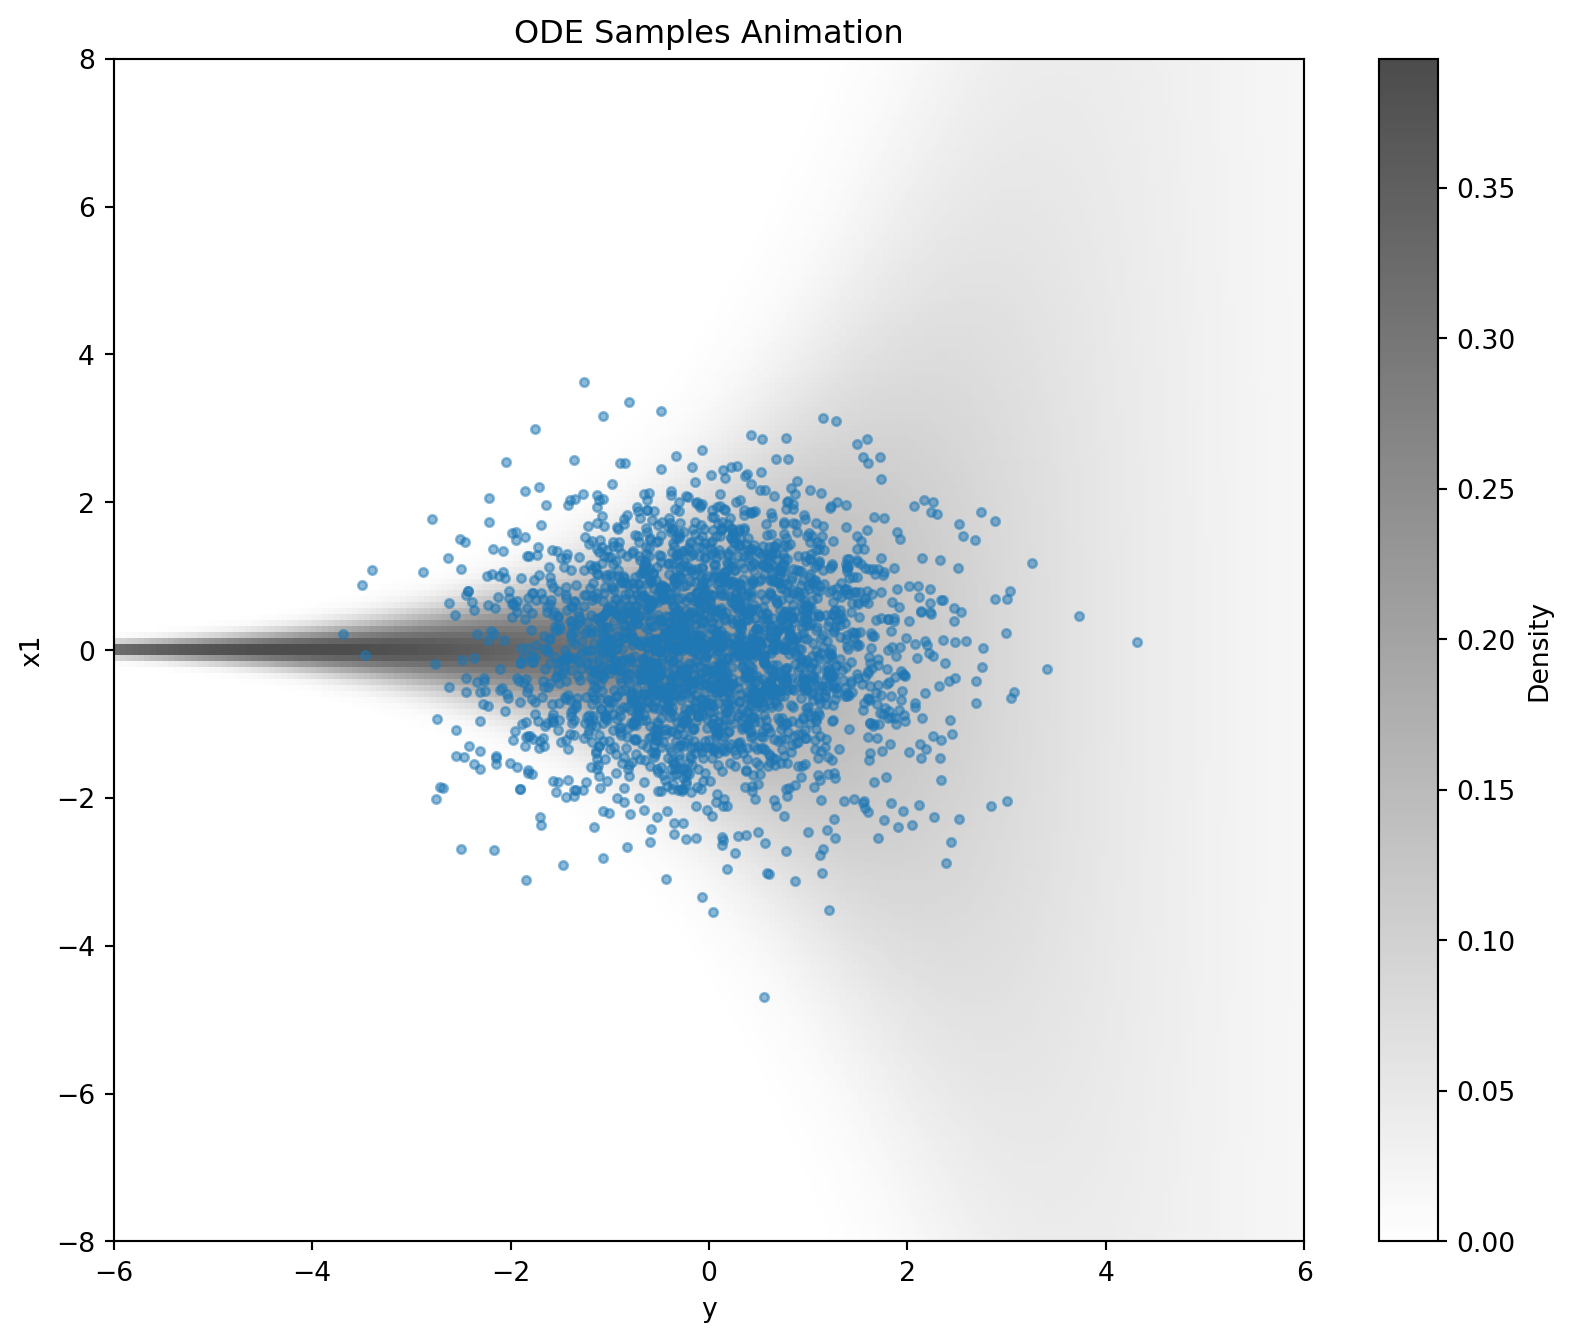

In [9]:
#| echo: false
import matplotlib.animation as animation

neg_energy, sample_data = funnel(d=2)

y_min, y_max = -6, 6
x1_min, x1_max = -8, 8
num_points = 200  # グリッドの解像度を下げて処理を軽くする

y_values = np.linspace(y_min, y_max, num_points)
x1_values = np.linspace(x1_min, x1_max, num_points)
Y, X1 = np.meshgrid(y_values, x1_values)

inputs = np.stack([Y.ravel(), X1.ravel()], axis=1)
log_density = neg_energy(inputs)
density = np.sqrt(np.exp(log_density))
Density = density.reshape(Y.shape)

# プロットの設定
fig, ax = plt.subplots(figsize=(10, 8))

# ヒートマップを描画（Density.T ではなく Density を使用）
im = ax.imshow(Density, extent=[y_min, y_max, x1_min, x1_max], 
               origin='lower', cmap='binary', aspect='auto', alpha=0.7)

# カラーバーを追加
plt.colorbar(im, label='Density')

# 初期データの取得
y0 = ode_data[:, 0, 0]  # y軸（第1次元）
x0 = ode_data[:, 0, 1]  # x軸（第2次元）
data0 = np.column_stack((y0, x0))

# 散布図を描画
scat = ax.scatter(data0[:, 0], data0[:, 1], s=10, alpha=0.5)

# 軸の範囲を設定
ax.set_xlim(y_min, y_max)
ax.set_ylim(x1_min, x1_max)
ax.set_xlabel('y')
ax.set_ylabel('x1')
ax.set_title('ODE Samples Animation')

# 初期化関数
def init():
    scat.set_offsets(data0)
    return scat,

# フレームごとの更新関数
def animate(i):
    y = ode_data[:, i, 0]  # y軸（第1次元）
    x = ode_data[:, i, 1]  # x軸（第2次元）
    data = np.column_stack((y, x))
    scat.set_offsets(data)
    return scat,

# アニメーションの作成
ani = animation.FuncAnimation(
    fig, animate, init_func=init, frames=ode_data.shape[1],
    interval=50, blit=False)

# アニメーションの保存
ani.save('ode_animation.gif', writer='pillow', fps=20)